# ASSIGNMENT 3
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

# Bank 2 (Menggunakan data bank-additional)

# Classification 

- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes
- Confusion Matrix 
- Visualization 



## Preprocessing Data
- Import Pustaka
- Data Loading
- Data Cleaning
- EDA (Exploration Data Analysis)

### Import Pustaka

In [2]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from IPython.display import Math, Latex
from IPython.core.display import Image
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})
import statsmodels.api as sm

import random
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

### Data Loading 

In [3]:
df=pd.read_csv('bank_additional.csv', sep=';')
print(df)

      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

        contact month day_of_week  ... 

In [4]:
print(df.shape)

(4119, 21)


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
df["y"].dtype

dtype('O')

In [10]:
df['y_num']=df["y"].replace({"no":0, "yes":1})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


In [11]:
df["y_num"].dtype

dtype('int64')

untuk menampilkan kolom

In [12]:
df_=df.head(10)
df_.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num'],
      dtype=object)

untuk memeriksa apakah ada kolom yang memiliki nilai null

In [13]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
dtype: int64

berdasarkan hasil output diatas menunjukkan bahwa tidak ada missing value pada data

In [14]:
print(df.isnull().any())

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
y_num             False
dtype: bool


## Data Cleaning

Tidak perlu melakukan data cleaning karena tidak terdapat missing value

## Exploration Data Analysis (EDA)

In [15]:
print(df.groupby)

<bound method DataFrame.groupby of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

    

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [17]:
df.min()

age                     18
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.635
nr.employed         4963.6
y                       no
y_num                    0
dtype: object

In [18]:
df.max()

age                      88
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               3643
campaign                 35
pdays                   999
previous                  6
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
y_num                     1
dtype: object

In [19]:
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object']

## Logistic Regression

In [20]:
x = df.drop(['y'], axis=1)
y = df['y']

In [21]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [22]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [23]:
df_x = pd.get_dummies(x)
df_x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [24]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   duration                       4119 non-null   int64  
 2   campaign                       4119 non-null   int64  
 3   pdays                          4119 non-null   int64  
 4   previous                       4119 non-null   int64  
 5   emp.var.rate                   4119 non-null   float64
 6   cons.price.idx                 4119 non-null   float64
 7   cons.conf.idx                  4119 non-null   float64
 8   euribor3m                      4119 non-null   float64
 9   nr.employed                    4119 non-null   float64
 10  y_num                          4119 non-null   int64  
 11  job_admin.                     4119 non-null   uint8  
 12  job_blue-collar                4119 non-null   u

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25,random_state = 123)

In [26]:
log_model =LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       914
         yes       1.00      1.00      1.00       116

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



In [28]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 1.0


## KNN (K-Nearest Neighbors)

In [29]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_2 = model_knn.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94       914
         yes       0.57      0.43      0.49       116

    accuracy                           0.90      1030
   macro avg       0.75      0.70      0.72      1030
weighted avg       0.89      0.90      0.89      1030



In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))

Accuracy: 0.9


## SVM (Support Vector Machine)

In [32]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_predict_3 = model_svm.predict(X_test)

In [33]:
print(classification_report(y_test, y_predict_3))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95       914
         yes       0.66      0.25      0.36       116

    accuracy                           0.90      1030
   macro avg       0.79      0.62      0.65      1030
weighted avg       0.88      0.90      0.88      1030



In [34]:
print("Accuracy:", accuracy_score(y_test, y_predict_3))

Accuracy: 0.9009708737864077


## Decission tree

In [35]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_predict_4 = model_dt.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict_4))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       914
         yes       1.00      1.00      1.00       116

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



In [37]:
print("Accuracy:", accuracy_score(y_test, y_predict_4))

Accuracy: 1.0


## Random Forest

In [38]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_predict_5 = model_rfc.predict(X_test)

In [39]:
print(classification_report(y_test, y_predict_5))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       914
         yes       1.00      1.00      1.00       116

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



In [40]:
print("Accuracy:", accuracy_score(y_test, y_predict_5))

Accuracy: 1.0


## Naive Bayes

In [41]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_predict_6 = model_nb.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict_6))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       914
         yes       1.00      1.00      1.00       116

    accuracy                           1.00      1030
   macro avg       1.00      1.00      1.00      1030
weighted avg       1.00      1.00      1.00      1030



In [43]:
print("Accuracy:", accuracy_score(y_test, y_predict_6))

Accuracy: 1.0


Berdasarkan output diatas, kita akan mengambil model logistik regresi yang akan digunakan untuk Confussion Matrix:

In [58]:
y_score = log_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=log_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

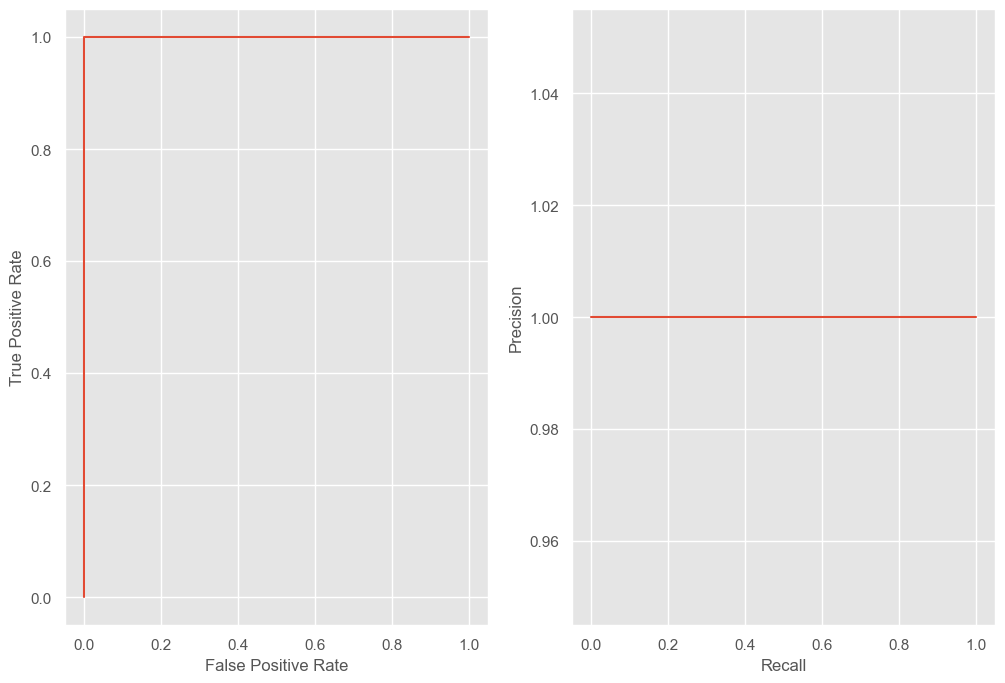

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Visualization

#### Confussion Matrix

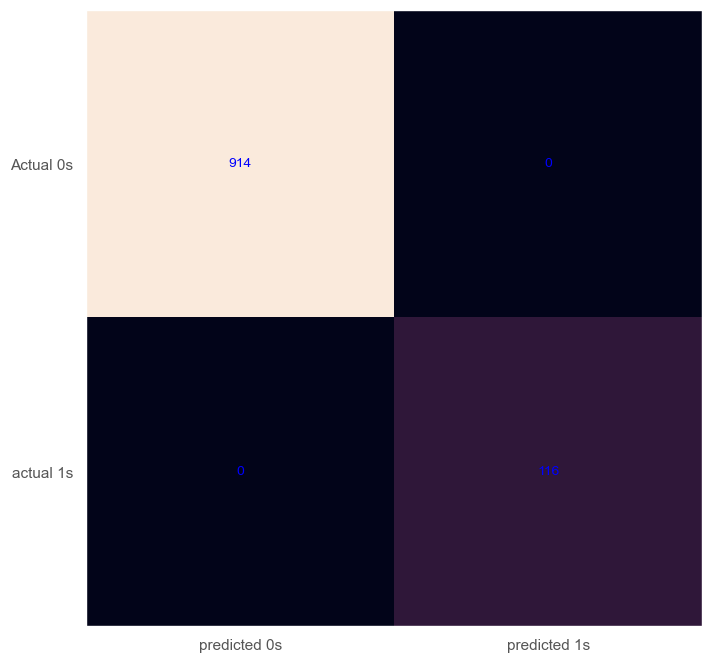

In [46]:
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

Setelah dilakukan Confusion Matrix, didapat : 
- True Negatives 914
- False Negatives 0
- False Positives 0
- True Positives 116

#### pairplot

In [47]:
df['marital'].value_counts()

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64

In [48]:
df_final = df[df['marital'] != 'unknown']
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


In [49]:
df_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0


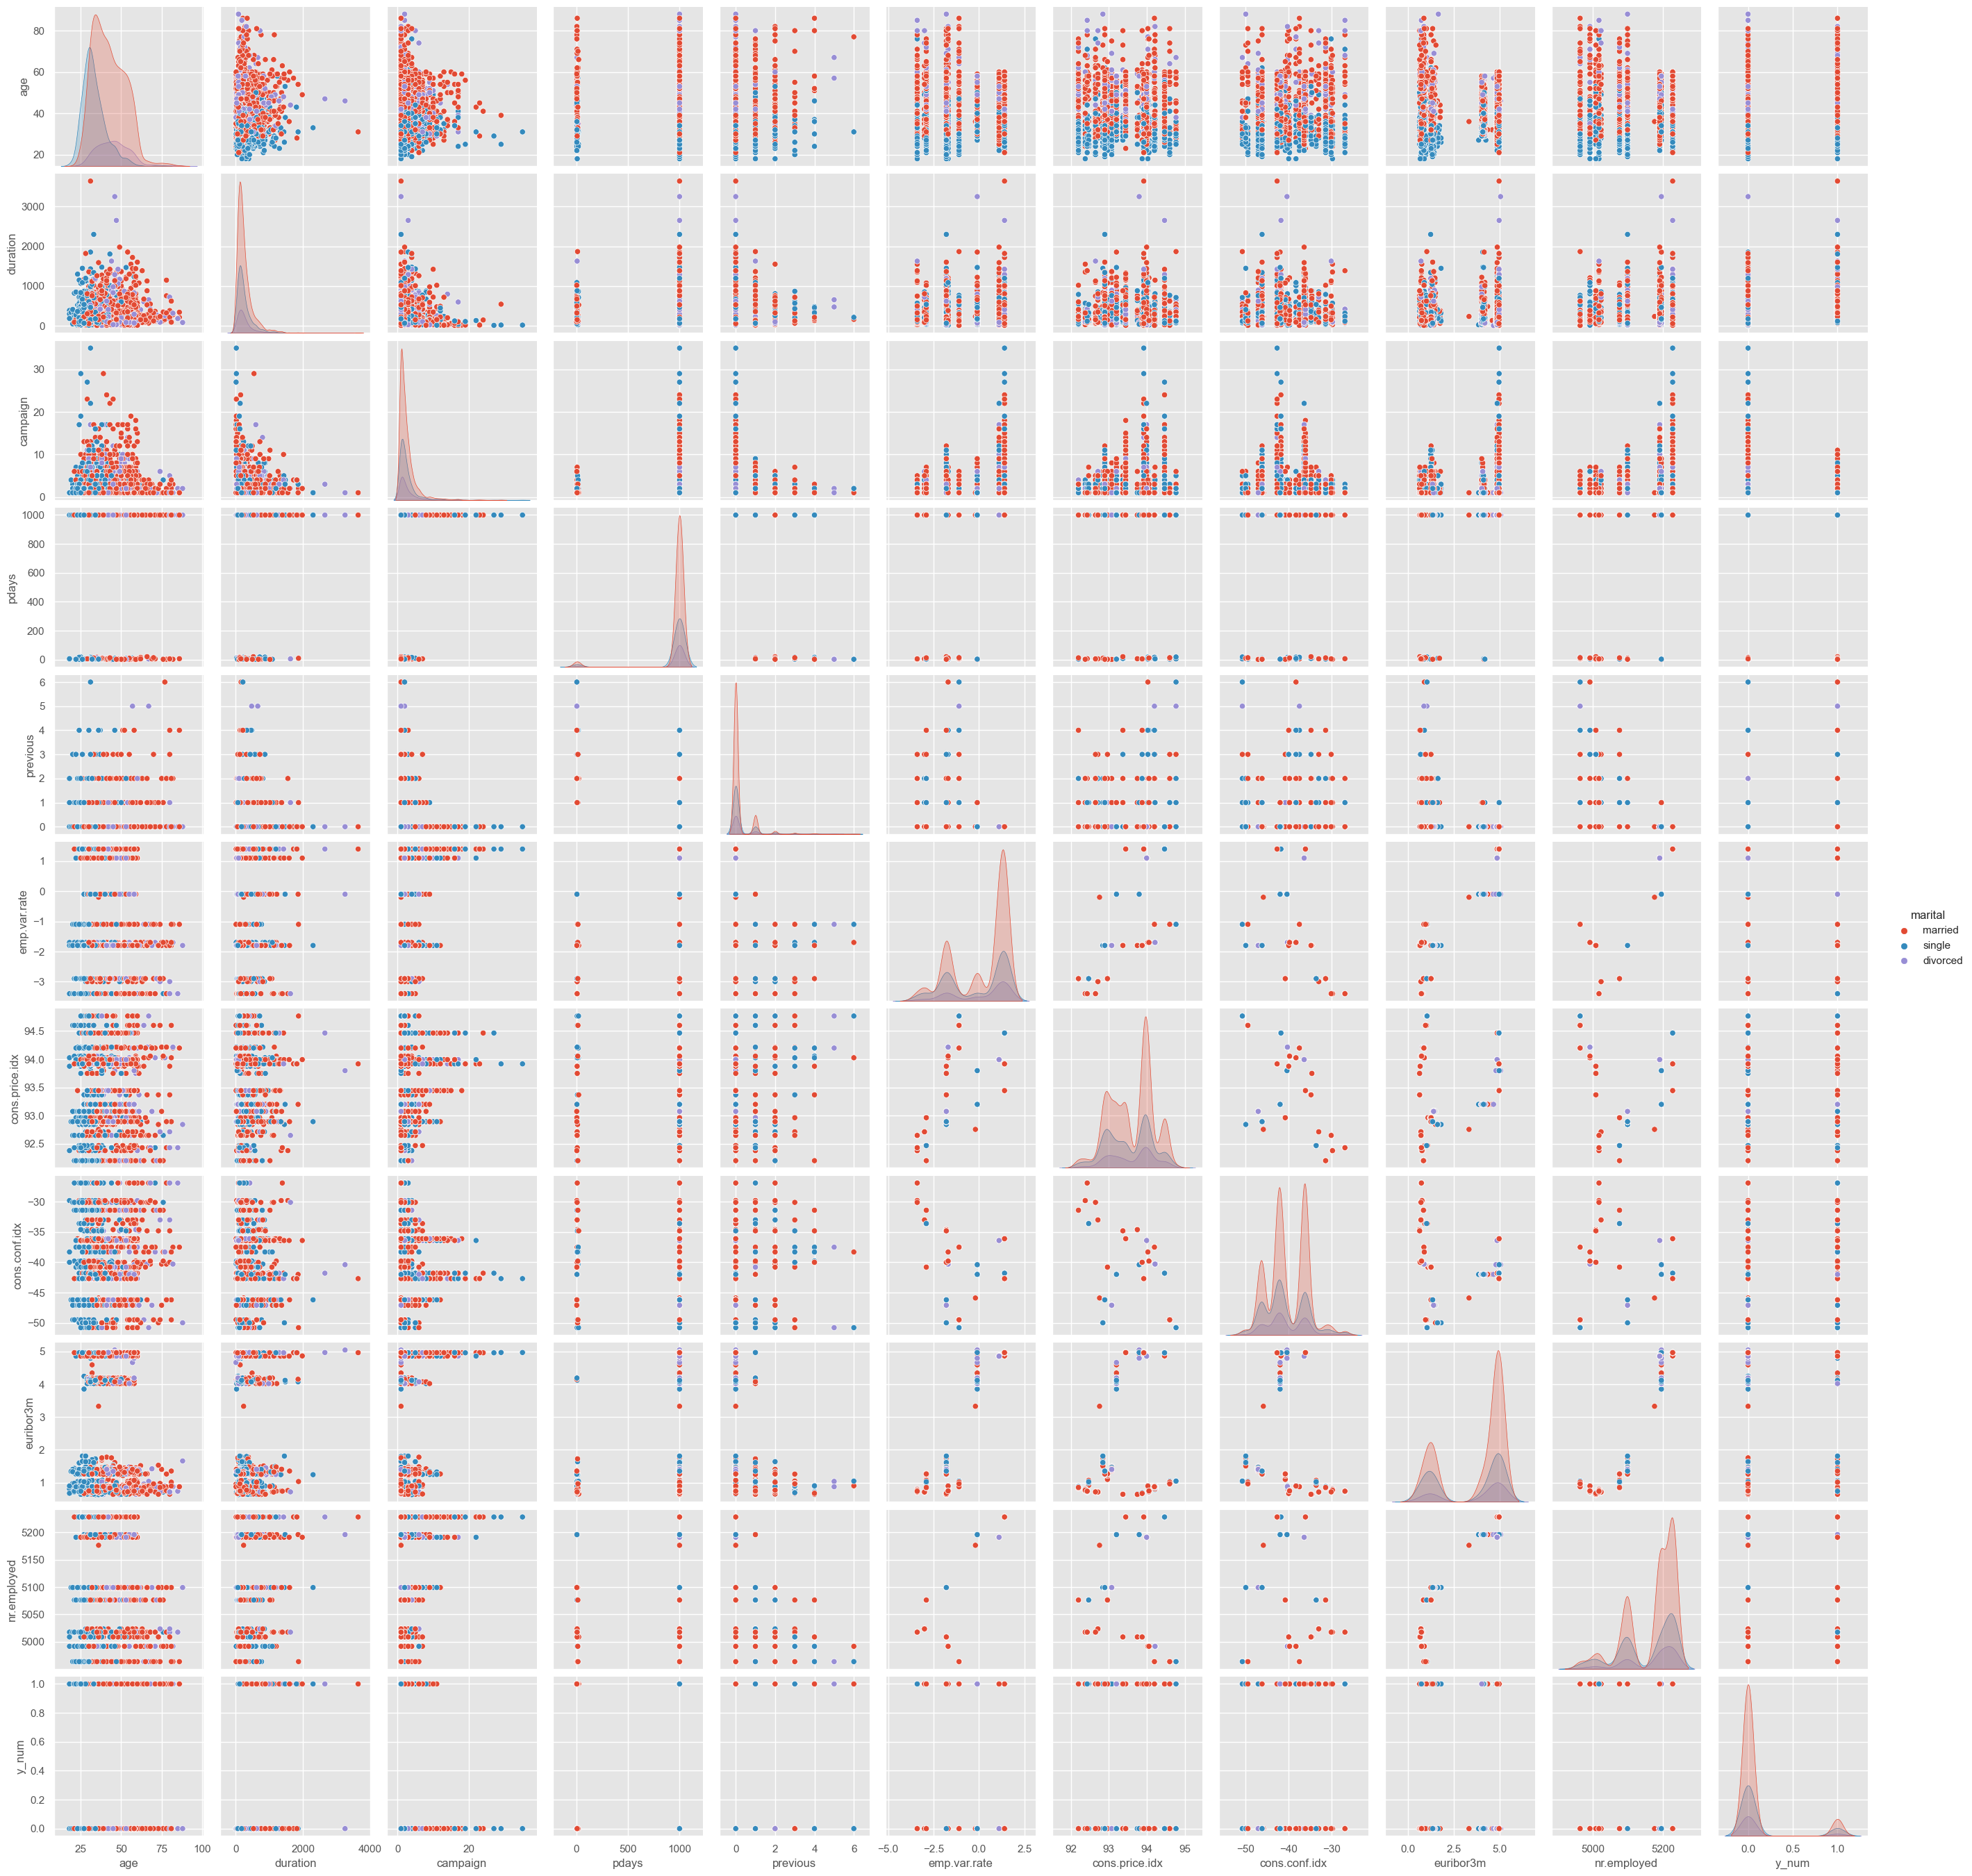

In [50]:
sns.pairplot(df_final, hue='marital', size=2.5)

#### Histogram

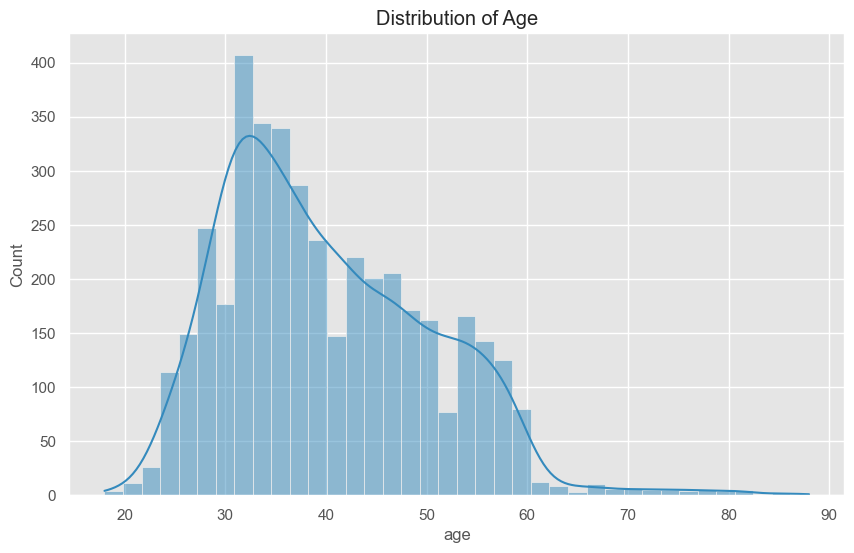

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="age", kde=True)
plt.title("Distribution of Age")
plt.show()

##### Interpretasi Output Histogram:
Berdasarkan output diatas, dapat dilihat bahwa kelompok umur antara 30-40 memiliki frekuensi tertinggi yang berlangganan deposito diantara kelompok umur lainnya

#### Scatter Plot

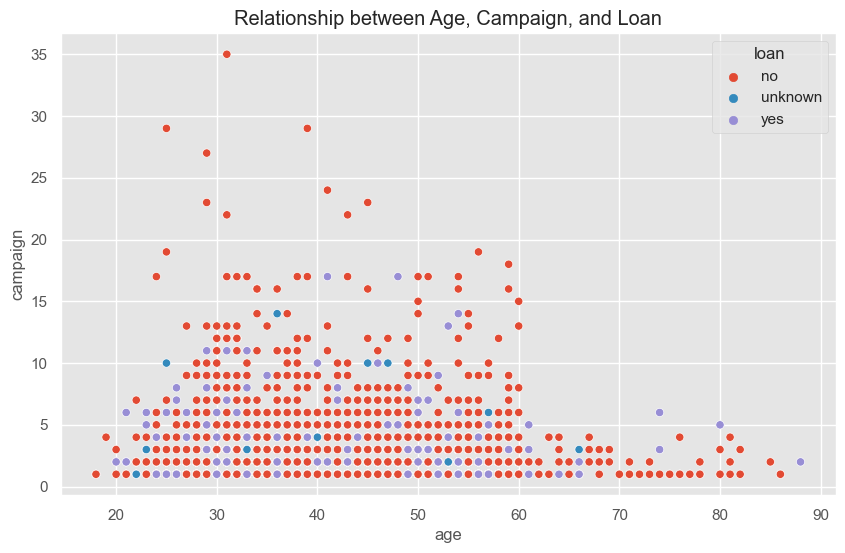

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="campaign", hue="loan")
plt.title("Relationship between Age, Campaign, and Loan")
plt.show()

##### Interpretasi Output Scatter Plot:
Berdasarkan output diatas, dapat dilihat bahwa plot menyebar yang artinya relationship between age, loan, and campaign memiliki hubungan atau korelasi yang sangat rendah atau bahkan tidak ada hubungan

#### Pie Chart

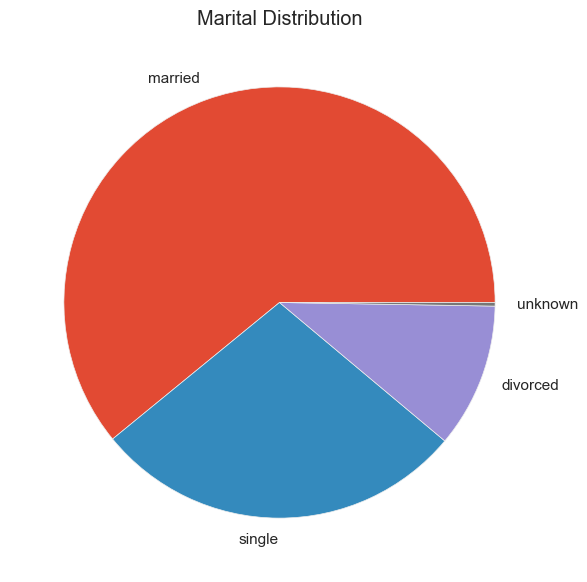

In [53]:
married_ = df['marital'].value_counts()
plt.pie(married_, labels=married_.index)
plt.title('Marital Distribution')
plt.show()

##### Interpretasi Output Pie Chart:
Berdasarkan output diatas, dapat dilihat bahwa angka status pernikahan terbanyak yang berlangganan deposito adalah menikah, disusul dengan status single, cerai dan lainnya

#### Heatmap

<AxesSubplot:>

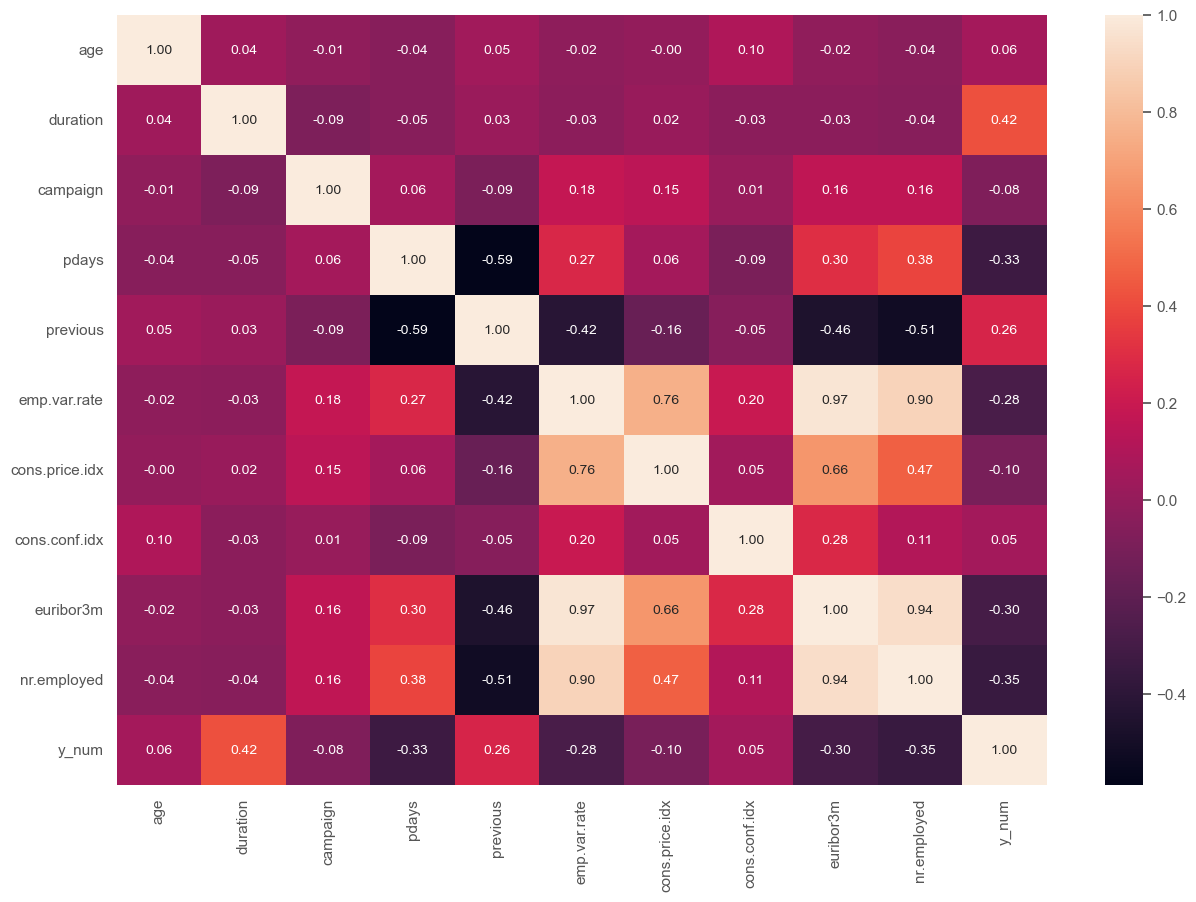

In [54]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##### Interpretasi Output Heatmap:

Berdasarkan output diatas, sebagian data memiliki korelasi yang kuat(>0.9), sedangkan yang lainnya memiliki korelasi yang sangat lemah (<0.2). tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.